# Prosper Loan Chargeoff Investigation

## by David Sutula

## Preliminary Wrangling

### Investigation Overview

This project looks at data for the Prosper Funding, LLC, a company linking investors to people in need of personal loans. The loans are unsecured. Prosper does not fund the loans themselves. Prosper offers a way to have multiple investors fund individual loans by providing a piece of the funding. Investors are able to view individual loans on their website, see details regarind the total amount the borrower is requesting, view the identified loan ris and borrower APR. According to their website, the typical return on investment is about 5.3%. (This information was obtained on Prosper's website: https://www.prosper.com)

When initially looking at the data, I noticed the dataset provided information regarding loans that are charged off. I am choosing to focus this analysis on loans that are charged-off and what factors may be present in that subset of loans.

As this data was not part of a randomized experiment, findings are not assumed to have causality.

### Dataset Overview

The dataset contains 113,937 rows of data and 81 columns of information, including borrower information, credit rating, amount borrowed, Loan Annual Percentage Rate (APR), information about loan losses, loan status, number of investors and loan funding and was provided to Udacity in support of the Data Analyst Nanodegree Program (Source: https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1554486256021000).

The dataset included the Prosper Loan Data in a .csv file and a data dictionary (Source: https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554486256024000)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import matplotlib.ticker as tick
from babel.numbers import format_currency


pd.options.mode.chained_assignment = None  # default='warn'

> First we read in the Prosper Loan data and review the dataset.  

In [2]:
# This code reads in the prosperLoanData.csv file
loan_data = pd.read_csv('prosperLoanData.csv')


In [3]:
# View the datafile.
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# Look at the structure of the datset using .shape
loan_data.shape


(113937, 81)

There are 113,937 rows in the data and 81 columns.

In [5]:
# changes system option for display to 1000 rows
pd.set_option('display.max_rows', 100)
# This code prints the data types for each of the variables in the dataset.
print(loan_data.dtypes)


ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

##### Quality Issues
* ListingNumber should be object 
* ListingCreationDate should be type "datetime"
* ClosedDate should be "datetime"
* ProsperRating should be int64
* LoanOriginationDate should be datetime
* ProsperRating (Numeric) and ProsperRating (Alpha) have spaces in the variable names.  Remove the spaces and parentheses. Use underscores.
* EmploymentStatusDuration should be int64 rather than float64.
* CreditScoreRangeLower and CreditScoreRangeUpper should be int64 rather than float64.
* FirstRecordedCreditLine should be datetime.
* TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate and ProsperPaymentsOneMonthPlusLate  should be int64.
* LoanNumber should be string.
* TotalTrades, TradesOpenedLast6Months should be int64.
* CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7Years, CurrentDelinquencies, PublicRecordsLast7Years, PublicRecordsLast10Years, and PublicRecordsLast12Months should be int64.
* DateCreditPulled should be datetime.
* ListingCategory (numeric) should be a category and eliminate the parentheses.  Remove the numeric and replace the values with the categories they actually represent( 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans)

##### Tidyness Issues
* Remove ProsperRatingNumeric as ProsperRatingAlpha contains the category information


In [6]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: solid; ('border-width':'1px')
    }
</style>

In [7]:
# This code increases the number of columns that will be displayed.
pd.options.display.max_columns=200

In [8]:
# Using describe with include = 'all' allows us to see information about every variable
loan_data.describe(include = 'all')

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,113937,1.139370e+05,113937,28953,113937.000000,113937,55089,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853,84853.000000,113937.000000,108422,110349,111682,106312.000000,113937,113937,13341,113937,113346.000000,113346.000000,113240,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,113937,113937,1.139370e+05,113937,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937,113937,113937,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
unique,113066,NaN,113064,8,NaN,12,2802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,51,67,8,NaN,2,2,706,112992,NaN,NaN,11585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2,NaN,113066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1873,33,90831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,17A93590655669644DB4C06,NaN,2013-10-02 17:20:16.550000000,C,NaN,Current,2014-03-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,CA,Other,Employed,NaN,True,False,783C3371218786870A73D20,2013-12-23 09:38:12,NaN,NaN,1993-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$25,000-49,999",True,NaN,CB1B37030986463208432A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-22 00:00:00,Q4 2013,63CA34120866140639431C9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,NaN,6,5649,NaN,56576,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18345,NaN,NaN,14717,28617,67322,NaN,57478,101218,1140,6,NaN,NaN,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32192,105268,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,491,14450,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.278857e+05,NaN,NaN,40.830248,NaN,NaN,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,NaN,5.950067,2.774209,NaN,NaN,NaN,96.071582,NaN,NaN,NaN,NaN,685.567731,704.567731,NaN,10.317192,9.260164,26.7

### Cleaning

We start by making a copy of the original data file.

In [9]:
cleaned_loan_data = loan_data.copy(deep = False)

ListingNumber should be object 
* ListingCreationDate, ClosedDate, LoanOriginationDate, FirstRecordedCreditLine should be datetime should be "datetime"

* LoanNumber should be string.
* DateCreditPulled should be datetime.
* ListingCategory (numeric) should be a category and eliminate the parentheses.  Remove the numeric and replace the values with the categories they actually represent( 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans)

Tidyness


### Define

ListingCreationDate, ClosedDate, LoanOriginationDate, FirstRecordedCreditLine, DateCreditPulled should be datetime should be "datetime"

### Code

In [10]:
# This code changes the following columns to datetime.
cleaned_loan_data['ListingCreationDate'] = pd.to_datetime(cleaned_loan_data['ListingCreationDate']) 
cleaned_loan_data['ClosedDate'] = pd.to_datetime(cleaned_loan_data['ClosedDate']) 
cleaned_loan_data['LoanOriginationDate'] = pd.to_datetime(cleaned_loan_data['LoanOriginationDate']) 
cleaned_loan_data['FirstRecordedCreditLine'] = pd.to_datetime(cleaned_loan_data['FirstRecordedCreditLine']) 
cleaned_loan_data['DateCreditPulled'] = pd.to_datetime(cleaned_loan_data['DateCreditPulled']) 

### Test

In [11]:
# This code tests that the columns were changed to datetime.
cleaned_loan_data[['ListingCreationDate', 'ClosedDate', 'LoanOriginationDate', 
                   'FirstRecordedCreditLine', 'DateCreditPulled']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ListingCreationDate      113937 non-null  datetime64[ns]
 1   ClosedDate               55089 non-null   datetime64[ns]
 2   LoanOriginationDate      113937 non-null  datetime64[ns]
 3   FirstRecordedCreditLine  113240 non-null  datetime64[ns]
 4   DateCreditPulled         113937 non-null  datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 4.3 MB


### Define

ProsperRating EmploymentStatusDuration,  CreditScoreRangeLower, CreditScoreRangeUpper, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, TotalTrades, TradesOpenedLast6Months, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7Years, CurrentDelinquencies, PublicRecordsLast7Years, PublicRecordsLast10Years, and PublicRecordsLast12Months should be int64.

Due to null values in the variables, it was necessary to replace null values in each of the fields below.  Null values are replaced in the first line of code and then the conversion to int64 is performed.

### Code

In [12]:
# Replace null values of EmploymentStatusDuration with a value of 0 as no employment would equal 0.
cleaned_loan_data.loc[(cleaned_loan_data['EmploymentStatusDuration'] < 0) 
                      | (cleaned_loan_data['EmploymentStatusDuration'].isnull()), 'EmploymentStatusDuration'] = 0

In [13]:
# This code converts EmploymentStatusDuration to int64
cleaned_loan_data[['EmploymentStatusDuration']] = cleaned_loan_data[['EmploymentStatusDuration']].astype('int64')

In [14]:
# Replace null values of CreditScoreRangeLower with a value of 0 as no employment would equal 0.
cleaned_loan_data.loc[(cleaned_loan_data['CreditScoreRangeLower'] < 0)
                      | (cleaned_loan_data['CreditScoreRangeLower'].isnull()), 'CreditScoreRangeLower'] = 999

In [15]:
# This code converts CreditScoreRangeLower to int64
cleaned_loan_data[['CreditScoreRangeLower']] = cleaned_loan_data[['CreditScoreRangeLower']].astype('int64')

In [16]:
# Replace null values of CreditScoreRangeUpper with a value of 0 as no employment would equal 0.
cleaned_loan_data.loc[(cleaned_loan_data['CreditScoreRangeUpper'] < 0)
                      | (cleaned_loan_data['CreditScoreRangeUpper'].isnull()), 'CreditScoreRangeUpper'] = 999

In [17]:
# This code converts CreditScoreRangeUpper to int64
cleaned_loan_data[['CreditScoreRangeUpper']] = cleaned_loan_data[['CreditScoreRangeUpper']].astype('int64')


In [18]:
# Replace null values of TotalProsperLoans with a value of 0 as no employment would equal 0.
cleaned_loan_data.loc[(cleaned_loan_data['TotalProsperLoans'] < 0)
                      | (cleaned_loan_data['TotalProsperLoans'].isnull()), 'TotalProsperLoans'] = 0

In [19]:
# This code converts TotalProsperLoans to int64
cleaned_loan_data[['TotalProsperLoans']] = cleaned_loan_data[['TotalProsperLoans']].astype('int64')


In [20]:
# Replace null values of TotalProsperPaymentsBilled with a value of 0 as no employment would equal 0.
cleaned_loan_data.loc[(cleaned_loan_data['TotalProsperPaymentsBilled'] < 0)
                      | (cleaned_loan_data['TotalProsperPaymentsBilled'].isnull()), 'TotalProsperPaymentsBilled'] = 0

In [21]:
# This code converts TotalProsperPaymentsBilled to int64
cleaned_loan_data[['TotalProsperPaymentsBilled']] = cleaned_loan_data[['TotalProsperPaymentsBilled']].astype('int64')


In [22]:
# Replace null values of OnTimeProsperPayments with a value of 0 as no employment would equal 0.
cleaned_loan_data.loc[(cleaned_loan_data['OnTimeProsperPayments'] < 0)
                      | (cleaned_loan_data['OnTimeProsperPayments'].isnull()), 'OnTimeProsperPayments'] = 0

In [23]:
# This code converts OnTimeProsperPayments to int64
cleaned_loan_data[['OnTimeProsperPayments']] = cleaned_loan_data[['OnTimeProsperPayments']].astype('int64')


In [24]:
# Replace null values of ProsperPaymentsLessThanOneMonthLate with a value of 0 as no employment would equal 0.
cleaned_loan_data.loc[(cleaned_loan_data['ProsperPaymentsLessThanOneMonthLate'] < 0)
                      | (cleaned_loan_data['ProsperPaymentsLessThanOneMonthLate'].isnull()),
                      'ProsperPaymentsLessThanOneMonthLate'] = 0

In [25]:
# This code converts ProsperPaymentsLessThanOneMonthLate to int64
cleaned_loan_data[['ProsperPaymentsLessThanOneMonthLate']] = cleaned_loan_data[['ProsperPaymentsLessThanOneMonthLate']].astype('int64')


In [26]:
# Replace null values of ProsperPaymentsOneMonthPlusLate with a value of 0 as no employment would equal 0.
cleaned_loan_data.loc[(cleaned_loan_data['ProsperPaymentsOneMonthPlusLate'] < 0)
                      | (cleaned_loan_data['ProsperPaymentsOneMonthPlusLate'].isnull()),
                      'ProsperPaymentsOneMonthPlusLate'] = 0

In [27]:
# This code converts ProsperPaymentsOneMonthPlusLate to int64
cleaned_loan_data[['ProsperPaymentsOneMonthPlusLate']] = cleaned_loan_data[['ProsperPaymentsOneMonthPlusLate']].astype('int64')


In [28]:
# Replace null values of TotalTrades with a value of 0 as no employment would equal 0.
cleaned_loan_data.loc[(cleaned_loan_data['TotalTrades'] < 0)
                      | (cleaned_loan_data['TotalTrades'].isnull()),
                      'TotalTrades'] = 0

In [29]:
# This code converts EmployTotalTradesmentStatusDuration to int64
cleaned_loan_data[['TotalTrades']] = cleaned_loan_data[['TotalTrades']].astype('int64')


In [30]:
# Replace null values of TradesOpenedLast6Months with a value of 0 as no employment would equal 0.
cleaned_loan_data.loc[(cleaned_loan_data['TradesOpenedLast6Months'] < 0)
                      | (cleaned_loan_data['TradesOpenedLast6Months'].isnull()),
                      'TradesOpenedLast6Months'] = 0

In [31]:
# This code converts TradesOpenedLast6Months to int64
cleaned_loan_data[['TradesOpenedLast6Months']] = cleaned_loan_data[['TradesOpenedLast6Months']].astype('int64')


In [32]:
# Replace null values of CurrentCreditLines with a value of 0 as no employment would equal 0.
cleaned_loan_data.loc[(cleaned_loan_data['CurrentCreditLines'] < 0)
                      | (cleaned_loan_data['CurrentCreditLines'].isnull()),
                      'CurrentCreditLines'] = 0

In [33]:
# This code converts CurrentCreditLines to int64
cleaned_loan_data[['CurrentCreditLines']] = cleaned_loan_data[['CurrentCreditLines']].astype('int64')


In [34]:
# Replace null values of OpenCreditLines with a value of 0 as no employment would equal 0.
cleaned_loan_data.loc[(cleaned_loan_data['OpenCreditLines'] < 0)
                      | (cleaned_loan_data['OpenCreditLines'].isnull()),
                      'OpenCreditLines'] = 0

In [35]:
# This code converts OpenCreditLines to int64
cleaned_loan_data[['OpenCreditLines']] = cleaned_loan_data[['OpenCreditLines']].astype('int64')


In [36]:
# Replace null values of TotalCreditLinespast7years with a value of 0 as no employment would equal 0.
cleaned_loan_data.loc[(cleaned_loan_data['TotalCreditLinespast7years'] < 0)
                      | (cleaned_loan_data['TotalCreditLinespast7years'].isnull()),
                      'TotalCreditLinespast7years'] = 0

In [37]:
# This code converts TotalCreditLinespast7years to int64
cleaned_loan_data[['TotalCreditLinespast7years']] = cleaned_loan_data[['TotalCreditLinespast7years']].astype('int64')


In [38]:
# Replace null values of CurrentDelinquencies with a value of 0 as no employment would equal 0.
cleaned_loan_data.loc[(cleaned_loan_data['CurrentDelinquencies'] < 0)
                      | (cleaned_loan_data['CurrentDelinquencies'].isnull()),
                      'CurrentDelinquencies'] = 0

In [39]:
# This code converts CurrentDelinquencies to int64
cleaned_loan_data[['CurrentDelinquencies']] = cleaned_loan_data[['CurrentDelinquencies']].astype('int64')


In [40]:
# Replace null values of DelinquenciesLast7Years with a value of 0 as no employment would equal 0.
cleaned_loan_data.loc[(cleaned_loan_data['DelinquenciesLast7Years'] < 0)
                      | (cleaned_loan_data['DelinquenciesLast7Years'].isnull()),
                      'DelinquenciesLast7Years'] = 0

In [41]:
# This code converts DelinquenciesLast7Years to int64
cleaned_loan_data[['DelinquenciesLast7Years']] = cleaned_loan_data[['DelinquenciesLast7Years']].astype('int64')


In [42]:
# Replace null values of PublicRecordsLast10Years with a value of 0 as no employment would equal 0.
cleaned_loan_data.loc[(cleaned_loan_data['PublicRecordsLast10Years'] < 0)
                      | (cleaned_loan_data['PublicRecordsLast10Years'].isnull()),
                      'PublicRecordsLast10Years'] = 0

In [43]:
# This code converts PublicRecordsLast10Years to int64
cleaned_loan_data[['PublicRecordsLast10Years']] = cleaned_loan_data[['PublicRecordsLast10Years']].astype('int64')


In [44]:
# Replace null values of PublicRecordsLast12Months with a value of 0 as no employment would equal 0.
cleaned_loan_data.loc[(cleaned_loan_data['PublicRecordsLast12Months'] < 0)
                      | (cleaned_loan_data['PublicRecordsLast12Months'].isnull()),
                      'PublicRecordsLast12Months'] = 0

In [45]:
# This code converts PublicRecordsLast12Months to int64
cleaned_loan_data[['PublicRecordsLast12Months']] = cleaned_loan_data[['PublicRecordsLast12Months']].astype('int64')


### Test

In [46]:
# Use .info() to validate data type changed to int64
cleaned_loan_data[['EmploymentStatusDuration',  'CreditScoreRangeLower', 'CreditScoreRangeUpper', 
                              'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 
                              'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'TotalTrades', 
                              'TradesOpenedLast6Months', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 
                              'CurrentDelinquencies', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 
                              'PublicRecordsLast12Months']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   EmploymentStatusDuration             113937 non-null  int64
 1   CreditScoreRangeLower                113937 non-null  int64
 2   CreditScoreRangeUpper                113937 non-null  int64
 3   TotalProsperLoans                    113937 non-null  int64
 4   TotalProsperPaymentsBilled           113937 non-null  int64
 5   OnTimeProsperPayments                113937 non-null  int64
 6   ProsperPaymentsLessThanOneMonthLate  113937 non-null  int64
 7   ProsperPaymentsOneMonthPlusLate      113937 non-null  int64
 8   TotalTrades                          113937 non-null  int64
 9   TradesOpenedLast6Months              113937 non-null  int64
 10  CurrentCreditLines                   113937 non-null  int64
 11  OpenCreditLines                      11

### Define

ProsperRating (Numeric) and ProsperRating (Alpha) have spaces in the variable names.  Remove the spaces and parentheses. Use underscores.


### Code

In [47]:
# Renames ProsperRating (numeric) and ProsperRating (Alpha)
cleaned_loan_data = cleaned_loan_data.rename(columns = {'ProsperRating (numeric)':'ProsperRatingNumeric'})
cleaned_loan_data = cleaned_loan_data.rename(columns = {'ProsperRating (Alpha)':'ProsperRatingAlpha'})
cleaned_loan_data = cleaned_loan_data.rename(columns = {'ListingCategory (numeric)':'ListingCategory'})


### Test

In [48]:
# Use .info() to validate the variable names were changed
cleaned_loan_data[['ProsperRatingNumeric', 'ProsperRatingAlpha']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProsperRatingNumeric  84853 non-null  float64
 1   ProsperRatingAlpha    84853 non-null  object 
dtypes: float64(1), object(1)
memory usage: 1.7+ MB


### Define

ListingNumber and LoanNumber should be type = string


### Code

In [49]:
# This code changes the two fileds to type string.
cleaned_loan_data['ListingNumber'] = cleaned_loan_data.ListingNumber.astype(str)
cleaned_loan_data['LoanNumber'] = cleaned_loan_data.LoanNumber.astype(str)


### Test

In [50]:
# This code tests to ensure the two fields were changed to string.
cleaned_loan_data[['ListingNumber','LoanNumber']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ListingNumber  113937 non-null  object
 1   LoanNumber     113937 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


### Define

ListingCategory (numeric) should be a category and eliminate the parentheses.  Remove the numeric and replace the values with the categories they actually represent( 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans)

Will need to change ListingCategory to string before changing values.

### Code

In [51]:
# This code changes Listing Category to string prior to replacing values.
cleaned_loan_data['ListingCategory'] = cleaned_loan_data.ListingCategory.astype(str)


In [52]:
# This code replaces the numeric (now string) values with what the codes actually represent.
cleaned_loan_data['ListingCategory'] = cleaned_loan_data['ListingCategory'].map({ '0' : 'Not Available', 
            '1' : 'Debt Consolidation', '2' : 'Home Improvement', '3' : 'Business', 
            '4' : 'Personal Loan', '5' : 'Student Use', '6' : 'Auto', '7' : 'Other', '8' : 'Baby/Adoption',
            '9' : 'Boat', '10' : 'Cosmetic Procedure', '11' : 'Engagement Ring', '12' : 'Green Loans', 
            '13' : 'Household Expenses', '14' : 'Large Purchases', '15' : 'Medical/Dental', '16' : 'Motorcycle',
            '17' : 'RV', '18' : 'Taxes', '19' : 'Vacation', '20' : 'Wedding Loans'})

### Test

In [53]:
# This code tests that the changes were successful.
cleaned_loan_data['ListingCategory'].value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby/Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

### Define

Remove ProsperRatingNumeric as ProsperRatingAlpha contains the category information

### Code

In [54]:
# This code drops ProsperRatingNumberic as it is no longer needed.
cleaned_loan_data.drop(['ProsperRatingNumeric'], axis = 1, inplace = True)

### Test

In [55]:
# This code ensures that ProsperRatingNumeric was dropped.
cleaned_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  object        
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

### Save

Save dataset as "loan_master.csv"

### Code

In [56]:
# Save cleaned_loan_data to loan_master.csv file
cleaned_loan_data.to_csv('loan_master.csv', index = False, encoding = 'utf-8')

### Analysis

### Import the data

In [57]:
# This code imports the saved loan_master.csv file and displays information about the file.
loan_master = pd.read_csv('loan_master.csv')
loan_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

Change date fields to datetime

In [58]:
# This code changes the strings to datetime.
loan_master['ListingCreationDate'] = pd.to_datetime(loan_master['ListingCreationDate']) 
loan_master['ClosedDate'] = pd.to_datetime(loan_master['ClosedDate']) 
loan_master['LoanOriginationDate'] = pd.to_datetime(loan_master['LoanOriginationDate']) 
loan_master['FirstRecordedCreditLine'] = pd.to_datetime(loan_master['FirstRecordedCreditLine']) 
loan_master['DateCreditPulled'] = pd.to_datetime(loan_master['DateCreditPulled']) 

In [59]:
# This code tests that the strings were converted to datetime.
loan_master[['ListingCreationDate', 'ClosedDate', 'LoanOriginationDate', 'FirstRecordedCreditLine', 'DateCreditPulled']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ListingCreationDate      113937 non-null  datetime64[ns]
 1   ClosedDate               55089 non-null   datetime64[ns]
 2   LoanOriginationDate      113937 non-null  datetime64[ns]
 3   FirstRecordedCreditLine  113240 non-null  datetime64[ns]
 4   DateCreditPulled         113937 non-null  datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 4.3 MB


In [60]:
#
loan_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

### What is the structure of your dataset?

> There are 113,937 rows of data, consisting of 3 boolean variables, 32 floating variables, 27 integer variables, 5 date/time, and 13 object variables.  The data provides information about:
* the borrower, including credit scores, number of outstanding loans, location of the borrower and member information
* Key Financial metrics related to the loan , including Borrower APR, Amount Borrowed, Monthly Loan Payments
* Metrics related to borrower fiscal health, including account inquiries, number of missed payments and
* Information regarding number of investors, investment from friends, amount invested, and percent funded to name a few.

### What is/are the main feature(s) of interest in your dataset?

> I first became interested in the chargeoff category when conducting an initial look at the loan status.  Chargedoff is the third largest category, behind loans that are current and those that completed. I am particularly interested in diving into loan chargeoff and in identifying what other factors are present in customers who's loans resulted in chargeoff.  The term chargeoff will be explained below.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> There are a number of variables in the dataset that can support the investigation.  We can start by looking at the status of each loan, seeing which loans have the largest categories.  We can look at the types of loans that exist in the chargeoff category.  We can look at the distribution of data in that category.  We will examine the relationship between variables using bivariate and multivariate analysis.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [61]:
# This code reformats the ticks, translating large numbers to their abbreviation (Billions, Millions, Thousands)
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

# code to reformat the x-axis obtained at the following URL:  
# https://dfrieds.com/data-visualizations/how-format-large-tick-values.html


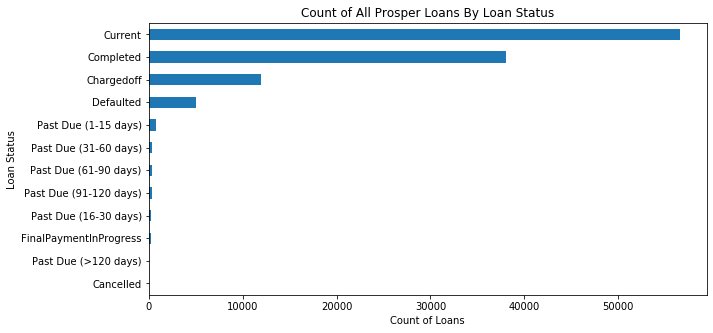

In [62]:
# This code plots the number of loans by loan Status
ax=loan_data.LoanStatus.value_counts().sort_values().plot(kind='barh', figsize = (10,5));
plt.title('Count of All Prosper Loans By Loan Status')
plt.xlabel('Count of Loans')
plt.ylabel('Loan Status');

In the chart above, we see that Current (meaning payments are being made up to date) is the largest category.  Completed loans are the next largest category.  The borrowers of these loans have completed their payments back to Prosper and their investors.
The third largest category is Chargedoff.  This is the area we will focus on in the analysis.

According to Investopedia, a charge-off occurs when debt is deemed unlikely to be collected by the creditor, typically following 180 days of non-payment (source:  Investopedia -  https://www.investopedia.com/terms/c/chargeoff-rate-credit-card.asp). 

Default is the failure to repay in excess of 270 days. (source: Investopedia - https://www.investopedia.com/terms/d/default2.asp)

Now that we identified the category we wish to investigate further, let's have some perspective on how large that category is.  We will dot that by looking at the the Original Loan Amount (the amount borrowed from Prosper).

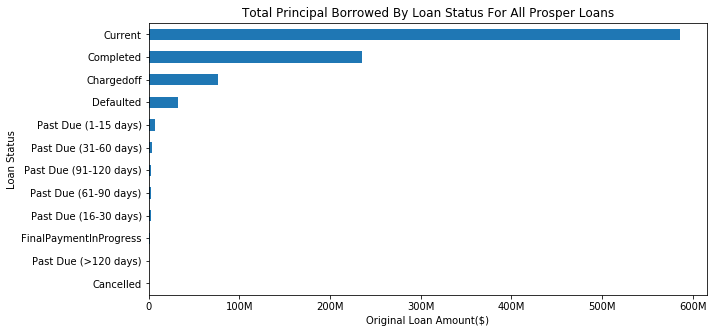

In [63]:
# This code creaates a horizontal bar chart displaying total loan principal amount by loan status.
loan_summary = loan_data.groupby('LoanStatus').LoanOriginalAmount.sum().sort_values().iloc[-12::,].plot(
kind='barh', figsize = (10,5))
loan_summary.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title('Total Principal Borrowed By Loan Status For All Prosper Loans')
plt.xlabel('Original Loan Amount($)')
plt.ylabel('Loan Status');



I am interested in understanding what factors identifed the chargeoff.  Looking at the chart, we have approximately $100M in loan amounts that were chargedoff.  We will start by selecting a dataset consisting of chargedoff and defaulted and look at additional factors.  I noticed that Prosper applies a rating code to the loans.  Let's look at the distribution of loans by ProsperScore

In [64]:
# This code creates a dataset that is a subset of the full datset.  It focuses on the chargeoff loan status only.
loan_chargeoff = loan_master.query('LoanStatus == "Chargedoff"')

Using only the chargeoff data, what types of loans result in chargeoffs.  Which are the top 5 categories for chargoff?

Total Principal Borrowed Resulting In Chargeoff:   76735809


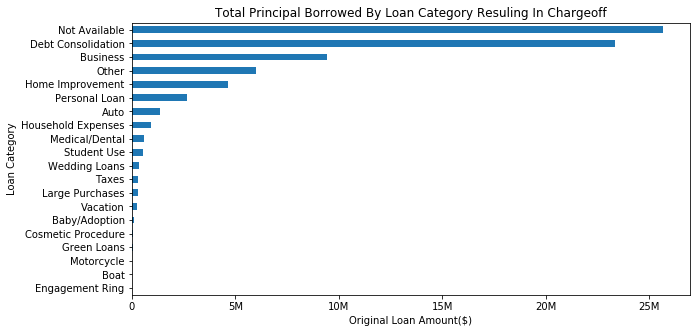

In [65]:
# This code creates a bar chart with total loan amounts by loan type.
ax = loan_chargeoff.groupby('ListingCategory').LoanOriginalAmount.sum().sort_values().iloc[-20::,].plot(
kind='barh', figsize = (10,5))
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title('Total Principal Borrowed By Loan Category Resuling In Chargeoff')
plt.xlabel('Original Loan Amount($)')
plt.ylabel('Loan Category');
print('Total Principal Borrowed Resulting In Chargeoff:  ', sum(loan_chargeoff['LoanOriginalAmount']));


The largest group of loans that resulted in chargeoff were in the "Not Available" category (not assigned to a particular category).  It was followd by Debt Consolidation, Business Loans, Other and Home Improvement.

Using only the chargeoff data subset, where do these loans fall using the ProsperRating field?

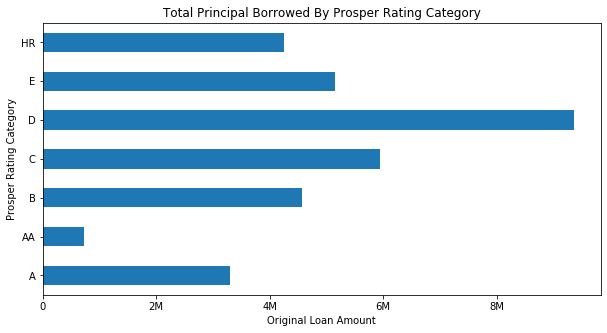

In [66]:
# This code creates a bar chart of total amount borrowed by Borrower's Prosper Risk Rating.
ax = loan_chargeoff.groupby('ProsperRatingAlpha').LoanOriginalAmount.sum().iloc[-20::,].plot(
kind='barh', figsize = (10,5))
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title('Total Principal Borrowed By Prosper Rating Category')
plt.xlabel('Original Loan Amount')
plt.ylabel('Prosper Rating Category');

Prosper's rating system identifies the level of risk associated with a loan in that rating category on an annual basis:
AA = 0 - 1.99%, A = 2.0 - 3.99%, B = 4 - 5.99%, C = 6 - 8.99%, D = 9 - 11.99%, E = 12 - 14.99%, and HR = >= 15.00%

Notice that Rating D has the largest amount of loans.  A and AA rated loans are the smallest group that received loans.  Looking on Prosper Loan's website, current APRs for the loan categories are as follows (depending on term of loan):
AA -  5.99 - 8.73%
A -  10.88 - 12.68%
B -  13.02 - 17.10%
C -  16.32 - 25.63%
D -  21.24 - 30.08%
E -  26.00 - 34.74%
HR - 31.72 - 35.97%

Source:  Prosper's Website:  https://www.prosper.com/invest/how-to-invest/prosper-ratings/?mod=article_inline

Still using the chargeoff data, are certain states more likely to have chargedoff loans?  Which are the top 10 states

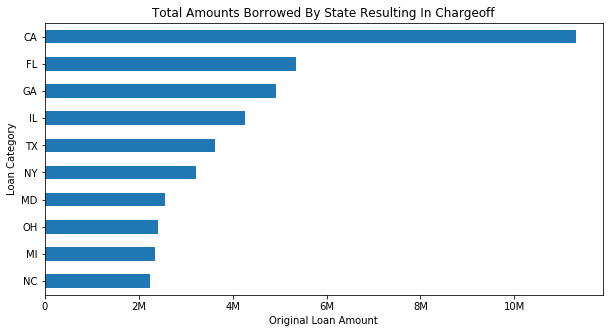

In [67]:
# This code creates a bar chart identifying total amount borrowed by state.
ax = loan_chargeoff.groupby('BorrowerState').LoanOriginalAmount.sum().sort_values(ascending=True)[41:].plot(
kind='barh', figsize = (10,5))
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title('Total Amounts Borrowed By State Resulting In Chargeoff')
plt.xlabel('Original Loan Amount')
plt.ylabel('Loan Category');

The largest number of chargeoffs appear to have occurred in California, followed by Florida, Georgia, Illinois, Texas, New York, Maryland, Ohio, Michigan and North Carolina (in descending order).

What does the distribution of chargeoffs look like?

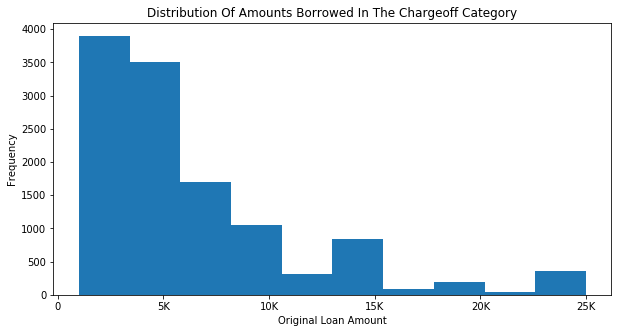

In [68]:
# This code creates a histogram chart showing the distribution of total amounts borrowed resulting in chargeoffs.
ax=loan_chargeoff.LoanOriginalAmount.plot(
kind='hist', figsize = (10,5))
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title('Distribution Of Amounts Borrowed In The Chargeoff Category')
plt.xlabel('Original Loan Amount');

 The largest number of loans appear to be in the $5,000 and lower category.  The distribution of original loan amounts in the chargeoff category appears to be left skewed and may appear to be multimodal.  We will attempt a transformation to see if the distribution is normal.

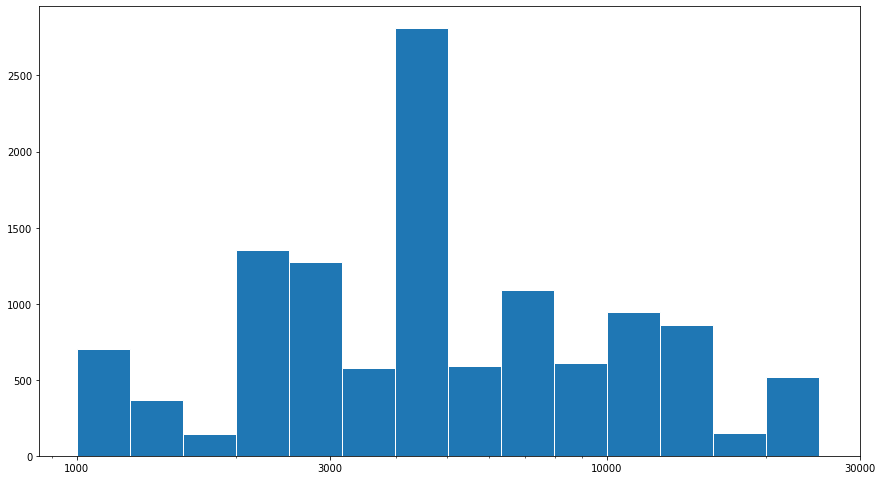

In [69]:
# This code creates a histogram chart showing the distribution of total amounts borrowed resulting in chargeoffs.
# In addition, a log transformation was performed on the x-axis and new scale was applied.
bins = 10** (np.arange(3,np.log10(loan_chargeoff.LoanOriginalAmount.max()) + 0.1, 0.1))
bins = [round(x,1) for x in bins]
plt.figure(figsize=[14.70, 8.27])
n, bins, patches = plt.hist(data =loan_chargeoff, x  = 'LoanOriginalAmount',
                            bins = bins, edgecolor = "white")
plt.xscale('log')

tick_locs = [1000, 3000, 10000, 30000]
plt.xticks(tick_locs, tick_locs);



After performing a log10 transformation, the distribution does not appear to be uniform.  It appears to be multimodal.  Let's adjust the bins to see if the distribution is normal. 

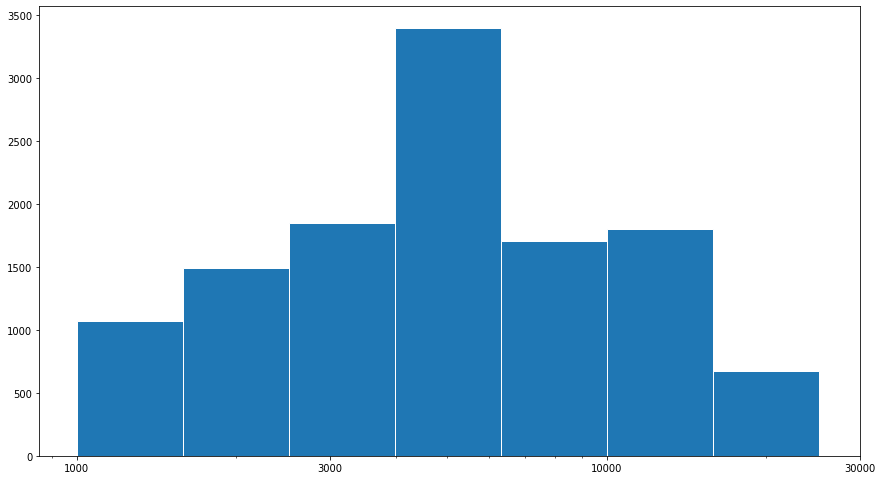

In [70]:
# Using the same code as above, the number of bins were adjusted.
bins = 10** (np.arange(3,np.log10(loan_chargeoff.LoanOriginalAmount.max()) + 0.2, 0.2))
bins = [round(x,1) for x in bins]
plt.figure(figsize=[14.70, 8.27])
n, bins, patches = plt.hist(data =loan_chargeoff, x  = 'LoanOriginalAmount',
                            bins = bins, edgecolor = "white")
plt.xscale('log')

tick_locs = [1000, 3000, 10000, 30000]
plt.xticks(tick_locs, tick_locs);



If we reduce the number of bins, the distribution starts to appear normal, however, we are reducing it too much.  The smaller number of bins is hiding the true distribution.

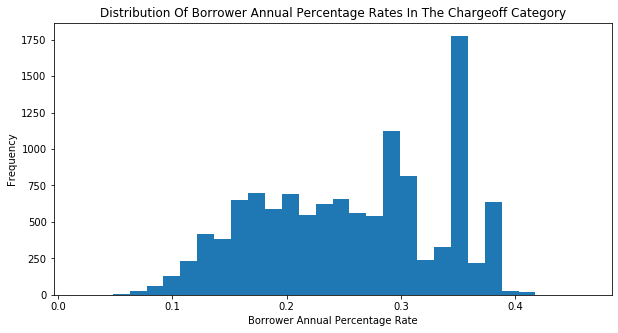

In [71]:
# This code creates a histogram of Borrower Annual Percentage Rates in the chargeoff category.
ax=loan_chargeoff.BorrowerAPR.plot(
kind='hist', figsize = (10,5), bins=30)
plt.title('Distribution Of Borrower Annual Percentage Rates In The Chargeoff Category')
plt.ylabel('Frequency')
plt.xlabel('Borrower Annual Percentage Rate');

The distribution of Borrower Annual Percentage Rate appears to be multimodal, with higher frequency at 30%, around 35% and around 38%.  

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The following items were of interest:

* The distribuion of Original Loan Amounts in the charge-off category appears to be fairly left skewed, with most of the loans falling below \$10,000 per loan. 
* There were a number of loans at the higher APRs at 30, approximately 35 and around 38 percent.
* Current  is the largest loan status category.  Completed loans are the next largest category.  The borrowers of these loans have completed their payments back to Prosper and their investors.
The third largest category is Chargedoff and is the area of study in this analysis.
* Approximately \$100M in loan amounts that were chargedoff.
* The largest group of loans that resulted in chargeoff were in the "Not Available" category (not assigned to a particular category). It was followed by Debt Consolidation, Business Loans, Other and Home Improvement.
* Prosper's rating system identifies the level of risk associated with a loan in that rating category on an annual basis: AA = 0 - 1.99%, A = 2.0 - 3.99%, B = 4 - 5.99%, C = 6 - 8.99%, D = 9 - 11.99%, E = 12 - 14.99%, and HR = >= 15.00%.  Rating D has the largest amount of loans. A and AA rated loans are the smallest group that received loans. 
* Looking on Prosper Loan's website, current APRs for the loan categories are as follows (depending on term of loan): AA - 5.99 - 8.73% A - 10.88 - 12.68% B - 13.02 - 17.10% C - 16.32 - 25.63% D - 21.24 - 30.08% E - 26.00 - 34.74% HR - 31.72 - 35.97%
* The largest number of chargeoffs appear to have occurred in California, followed by Florida, Georgia, Illinois, Texas, New York, Maryland, Ohio, Michigan and North Carolina (in descending order).
* The largest number of loans appear to be in the $5,000 and lower category. 
* The distribution of original loan amounts in the chargeoff category appears to be left skewed and may appear to be multimodal. 
* Performing the log10 transformation, we were able to see the distribution appeared multimodal.
* The distribution of Borrower Annual Percentage Rate also appears to be multimodal, with higher count of loans at 30%, around 35% and around 38% annual percentage rates.  


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I decided to do a log transformation on the data to see if the Loan Original Amount was approximately log normal distributed.  If I reduced the bins to 7, Original Loan Amount appears to be log normally distributed, however, if I use a larger number of bins (14), the diestibution appears to be multimodal.  I believe that the smaller number of bins hides characteristics of the data and that the distribution is multimodal. This will be explored further in the bivariate exploration using Loan Origination Amount and looking at loan type.

## Bivariate Exploration

We continue the exploration by looking at the distribution of loans in the chargedoff category.  This will allow us to understand what might be driving the higher level distribution (above) to appear multimodal.

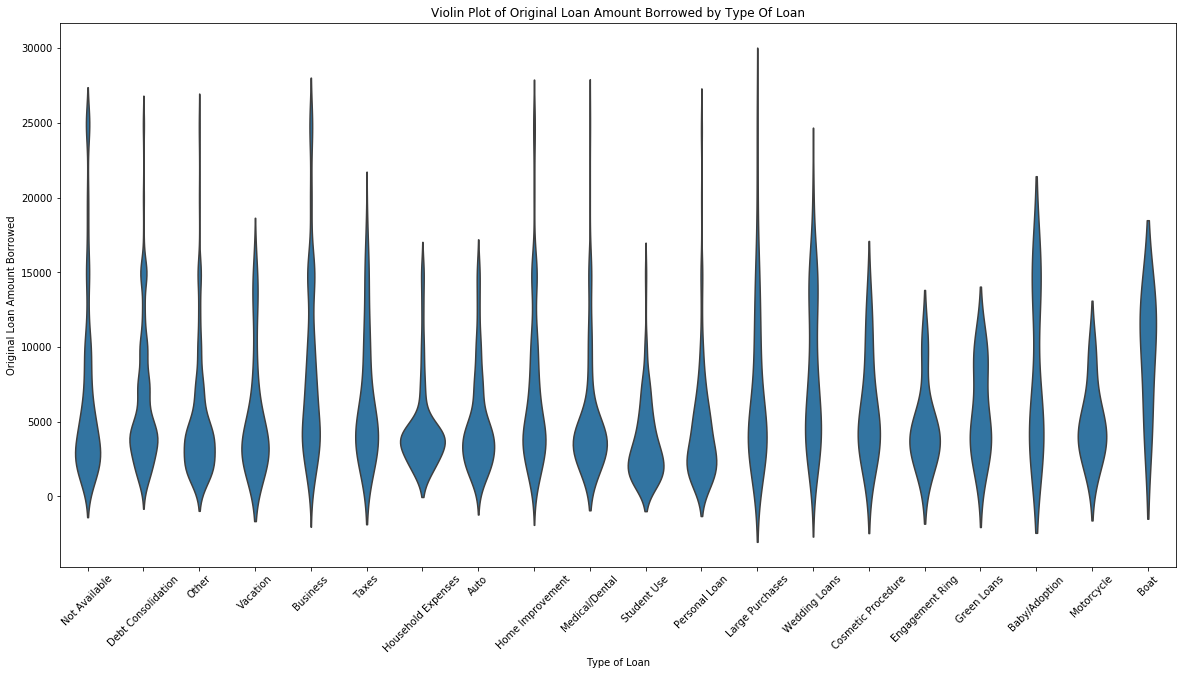

In [72]:
# This code creates a violin plot of Original Loan Amount and Listing Category
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
ax=sb.violinplot(data = loan_chargeoff, x = 'ListingCategory', y = 'LoanOriginalAmount', color = base_color,
              inner = None)
plt.xticks(rotation = 45)
plt.title('Violin Plot of Original Loan Amount Borrowed by Type Of Loan')
plt.ylabel('Original Loan Amount Borrowed')
plt.xlabel('Type of Loan');



The violin plots by Listing Category confirm what we suspected above, showing that a number of the categories are skewed and multimodal.  Left skewed categories include all of the categores except Green Loans, Baby/Adoption  and Boat.  Green Loans and Baby/Adoption are multimodal, but, not left or right skewed.  Boat appears to be right skewed.   For the most part, the majority of the loans appear to be for less that $10,000.  Boat Loans, Wedding Loans, Business, Debt Consolidation seemed to be the listing categories with the larger loans that were charged off.

Now that we understand the distribution of loan amounts, let's Let's now look to see the distribution of interest rates by lending category for loans redulting in chargeoff.

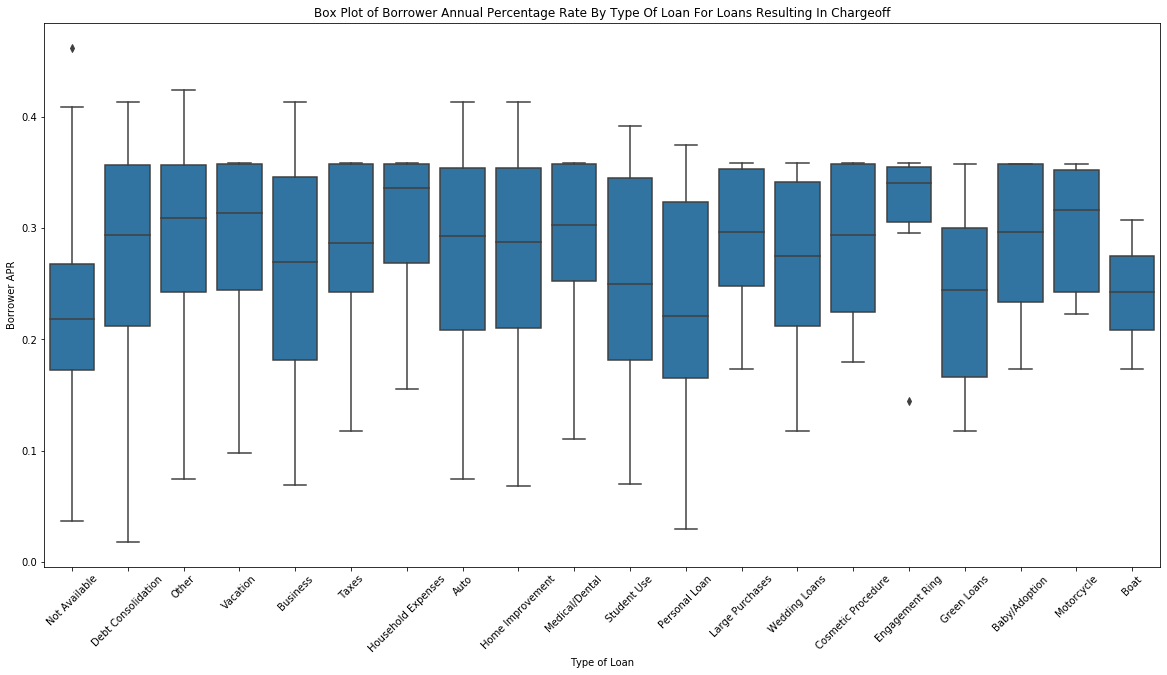

In [73]:
# This code creates a boxplot of listing category and borrower apr for loans resulting in chargeoff.
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
sb.boxplot(data = loan_chargeoff, x = 'ListingCategory', y = 'BorrowerAPR', color = base_color)
plt.xticks(rotation = 45)
plt.title('Box Plot of Borrower Annual Percentage Rate By Type Of Loan For Loans Resulting In Chargeoff')
plt.ylabel('Borrower APR')
plt.xlabel('Type of Loan');

Interesting that the majority of these loans falling into chargeoff had extremely high interest rates.  In most of these categories, the interquartile range was in excess of 20% Annual Percentage Rate. This is consistent with what we observed on Prosper's website:  https://www.prosper.com/loans/rates-and-fees/?refac=CANMB&refmc=6YRANV&refd=prosperblog.  

Now, let's look at how this compares with the larger group of loans that include all categories of loans, including Current, Closed, Chargedoff, Defaulted, and all of the categories of Past Due.

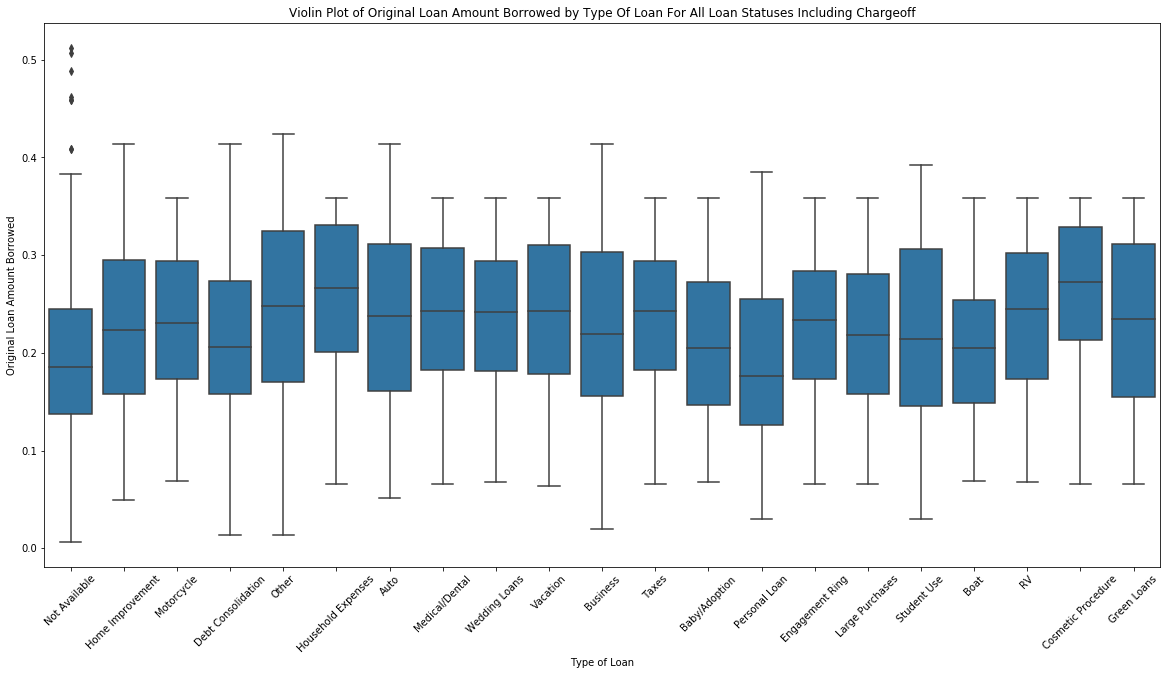

In [74]:
# This code creates a boxplot of listing category and borrower apr for loans in all loan categories offered by Prosper.
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
sb.boxplot(data = cleaned_loan_data, x = 'ListingCategory', y = 'BorrowerAPR', color = base_color)
plt.xticks(rotation = 45)
plt.title('Violin Plot of Original Loan Amount Borrowed by Type Of Loan For All Loan Statuses Including Chargeoff')
plt.ylabel('Original Loan Amount Borrowed')
plt.xlabel('Type of Loan');

Interesting that the interquartile range seems to be shifted slightly lower for Borrower APR in the chart showing showing all categories of loans, however, there is not a significant shift.  Looking at the long tails, I wonder if the difference seen in Borrower APR may be due to the Prosper Rating Category the borrower falls into.  

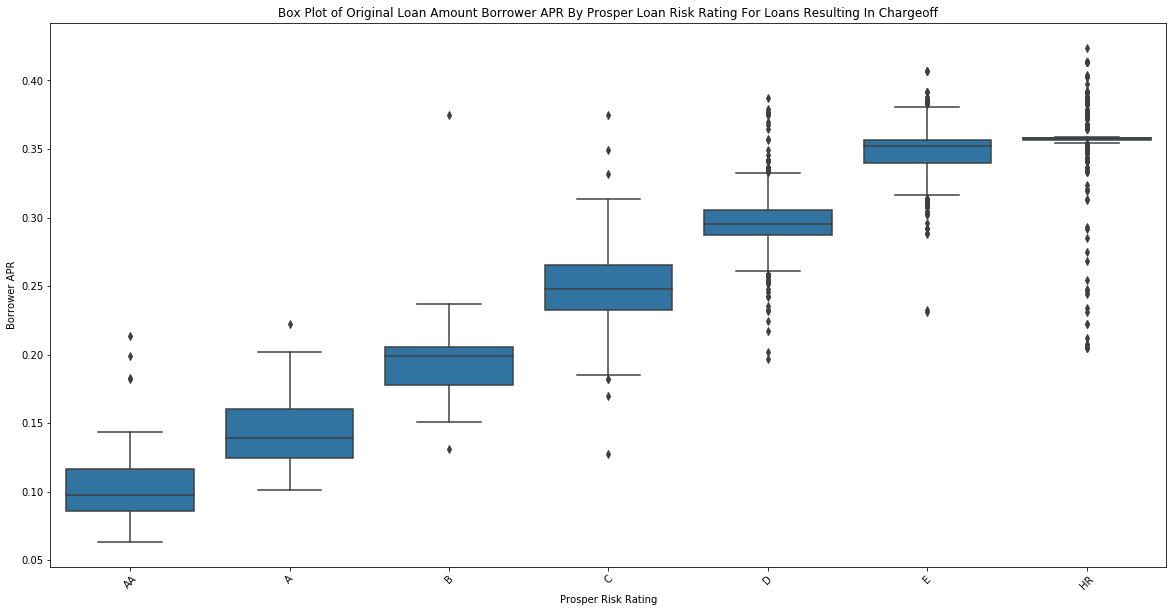

In [75]:
# This code creates a boxplot of Prosper Rating and borrower apr for loans resulting in chargeoff.
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
sb.boxplot(data = loan_chargeoff, x = 'ProsperRatingAlpha', y = 'BorrowerAPR', color = base_color, 
          order = ["AA", "A", "B", "C", "D", "E", "HR"])
plt.xticks(rotation = 45)
plt.title('Box Plot of Original Loan Amount Borrower APR By Prosper Loan Risk Rating For Loans Resulting In Chargeoff')
plt.ylabel('Borrower APR')
plt.xlabel('Prosper Risk Rating');

Looking at the interquartile ranges in the boxplot above, we can see that Risk is the primary factor in determining what Borrower APR is assigned to the loan.  

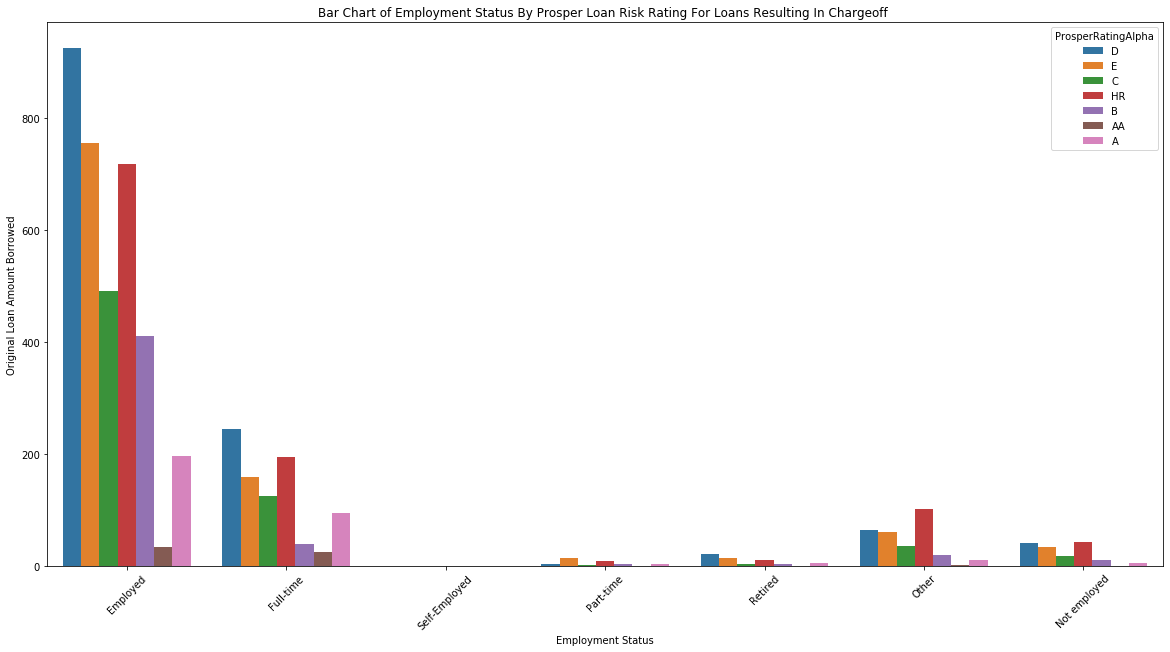

In [76]:
# This code creates a bar chart showing the different employment categories for loans resulting in chargeoff.  
# The different bar colors correspond to the Prosper borrower risk ratings.
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
sb.countplot(data = loan_chargeoff, x = 'EmploymentStatus', hue='ProsperRatingAlpha',
           order = ["Employed", "Full-time", "Self-Employed", "Part-time", "Retired", "Other", "Not employed"])
plt.xticks(rotation = 45)
plt.title('Bar Chart of Employment Status By Prosper Loan Risk Rating For Loans Resulting In Chargeoff ')
plt.ylabel('Original Loan Amount Borrowed')
plt.xlabel('Employment Status');

The largest group of chargeoff loans is for those who are identified as employed, followed by those identifed as working full-time.  Within the employed and full-time categories, the D rating appears to be the highest.  E and HR also appear to be high in almost every loan category for loans that resulted in chargeoff.  Let's see how that compares to the full group of loans in the chart below (includes all loan statuses).

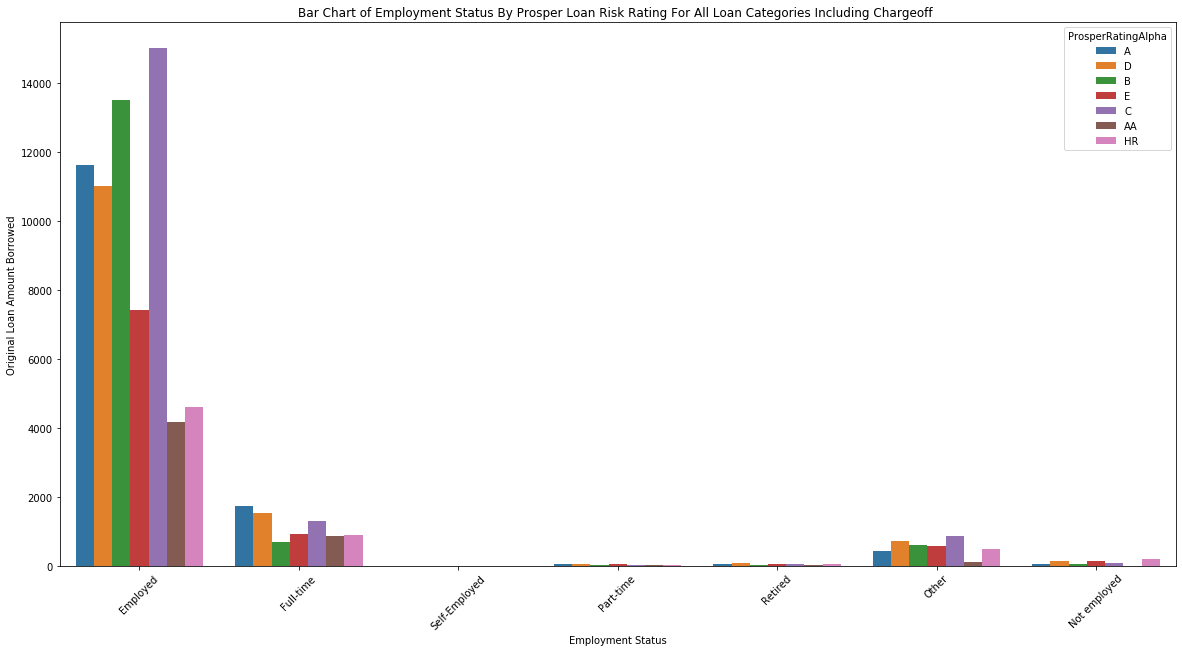

In [77]:
# This code creates a bar chart showing the different employment categories for loans from all loan status categories.  
# The different bar colors correspond to the Prosper borrower risk ratings.
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
sb.countplot(data = cleaned_loan_data, x = 'EmploymentStatus', hue='ProsperRatingAlpha',
           order = ["Employed", "Full-time", "Self-Employed", "Part-time", "Retired", "Other", "Not employed"])
plt.xticks(rotation = 45)
plt.title('Bar Chart of Employment Status By Prosper Loan Risk Rating For All Loan Categories Including Chargeoff ')
plt.ylabel('Original Loan Amount Borrowed')
plt.xlabel('Employment Status');

In the data set including all of the loan statuses, the largest loan category has a Prosper Rating of C, followed by B, and A.  This shows a difference from the loan status of chargeoff (in the prior chart).  Loans resulting in chargeoff are more likely to have a prosper rating of D, E or HR.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It was interesting to see that loans that ended in chargeoff did not seem to have a much larger Borrower APR than other categories of loans.  It was also interesting to see that borrowers with a Prosper Rating of D, E or HR were more likely to have loans resulting in chargeoff.

* The violin plots of Original Loan Amount by Listing Category confirmed that number of the listing categories are skewed and multimodal for Original Loan Amount.  Left skewed categories include all of the categores except Green Loans, Baby/Adoption  and Boat.  Green Loans and Baby/Adoption are multimodal, but, not left or right skewed.  Boat appears to be right skewed.   
* For the most part, the majority of the loans appear to be for less that \$10,000.  
* Boat Loans, Wedding Loans, Business, Debt Consolidation seemed to be the listing categories with the larger loans that were charged off.
* The majority of loans falling into chargeoff had extremely high interest rates.  In most of these categories, the interquartile range was in excess of 20\% Annual Percentage Rate. This is consistent with what we observed on Prosper's website:  https://www.prosper.com/loans/rates-and-fees/?refac=CANMB&refmc=6YRANV&refd=prosperblog.  
* Interesting that the interquartile range seems to be shifted slightly lower for Borrower APR in the chart showing showing all categories of loans, however, there is not a significant shift. 
*Looking at the interquartile ranges for Borrower APR by Prosper Rating, Loan Risk (also known as Prosper's borrower Risk Rating) is the primary factor in determining what Borrower APR is assigned to the loan. 
* The largest group of chargeoff loans is for those who are identified as employed, followed by those identifed as working full-time.  Within the employed and full-time categories, the D rating appears to be the highest.  E and HR also appear to be high in almost every loan category for loans that resulted in chargeoff.  


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Initially I was wondering if loans had a different interest rate by category, but, that did not seem to be the case.  Looking at violin and box plots of loans by listing category, the distributions did not seem to be visually significantly different, sending me to look for another cause.  It is clear from the Box Plot of Prosper Rating and Borrower APR that the level of Borrower Risk identified Prosper determines where the Borrower APR is likely to be set.

## Multivariate Exploration

> In this section, we will continue to look at additional relationships in the Chargeoff Loan category.  First, let's look at how Borrower APR is affected by the amount borrowed.

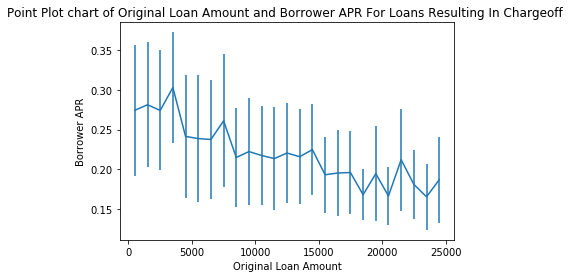

In [78]:
# This code creates a pointplot, plots the mean of each point, connected by lines and shows the variability of each bin.

# set bin edges, compute centers
#plt.figure(figsize = [20, 10])
bin_size = 1000
xbin_edges = np.arange(0.5, loan_chargeoff['LoanOriginalAmount'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

# compute statistics in each bin
data_xbins = pd.cut(loan_chargeoff['LoanOriginalAmount'], xbin_edges, right = False, include_lowest = True)
y_means = loan_chargeoff['BorrowerAPR'].groupby(data_xbins).mean()
y_std = loan_chargeoff['BorrowerAPR'].groupby(data_xbins).std()

# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_std)
plt.title('Point Plot chart of Original Loan Amount and Borrower APR For Loans Resulting In Chargeoff ')
plt.xlabel('Original Loan Amount')
plt.ylabel('Borrower APR');


Interesting that the interest rate is higher for smaller loan sizes.  There is an decrease in variability of the interest rate as the size of the loan increases.  Next, we will look to see what effect time has on the Borrower's APR and if the Borrower's employment status has an effect on the interest rate.

In [79]:
# This code resets the index
loan_chargeoff.reset_index(inplace = True)

In [80]:
# This code creates a variable called year.
loan_chargeoff['year'] = loan_chargeoff['ListingCreationDate'].apply(lambda x: x.year)

In [81]:
# This code tests to ensure that year was created.
loan_chargeoff['year']

0        2006
1        2007
2        2011
3        2007
4        2011
         ... 
11987    2012
11988    2012
11989    2008
11990    2007
11991    2011
Name: year, Length: 11992, dtype: int64

In [82]:
# This code creates a new dataset called loan_years in preparation for creating a line chart.
loan_years = loan_chargeoff.groupby(['EmploymentStatus', 'year'],  as_index=False).BorrowerAPR.mean()
#.groupby('EmploymentStatus')
loan_years.head(10)

,EmploymentStatus,year,BorrowerAPR
0,Employed,2010,0.314213
1,Employed,2011,0.296780
2,Employed,2012,0.289035
3,Employed,2013,0.266336
4,Full-time,2007,0.218844
5,Full-time,2008,0.245105
6,Full-time,2009,0.263548
7,Full-time,2010,0.289210
8,Full-time,2011,0.289700
9,Full-time,2012,0.283273


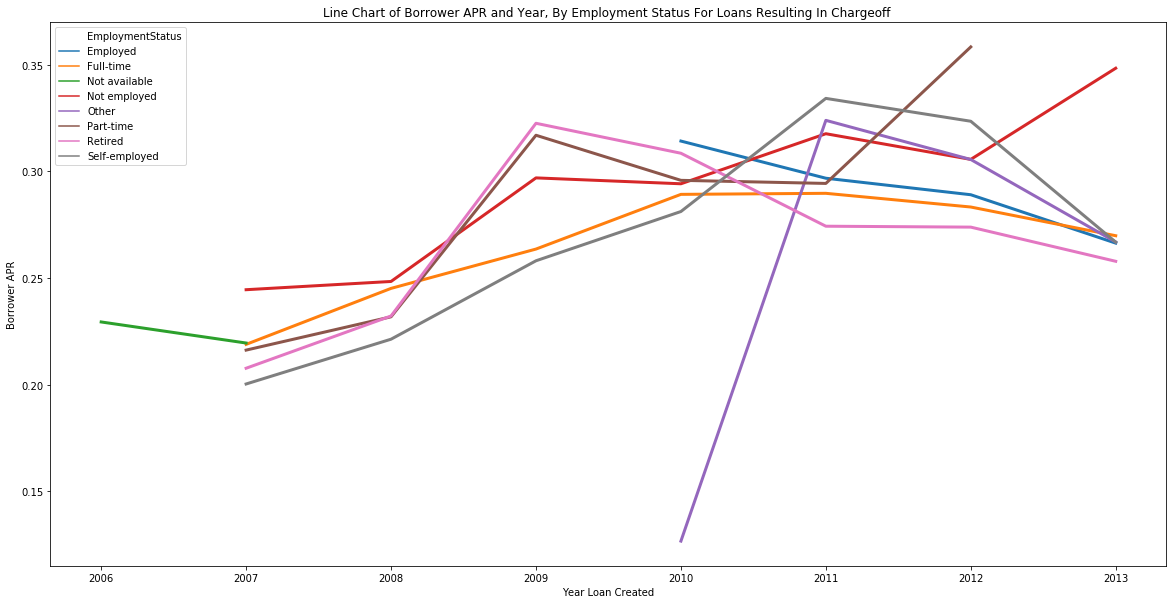

In [83]:
# This code creates the line chart.
plt.figure(figsize = [20, 10])
sb.lineplot(data=loan_years, x='year', y='BorrowerAPR', hue='EmploymentStatus', linewidth = 3)
plt.title('Line Chart of Borrower APR and Year, By Employment Status For Loans Resulting In Chargeoff ')
plt.ylabel('Borrower APR')
plt.xlabel('Year Loan Created');

Looking at the line plot above, Borrower APR appeared to increase in all categories from 2007 to 2011.  It appeared to decline after 2011 decline for all but 2 categories of employment status (Not Employed and Part Time).  Employed and Retired appear to have been added as employment status categories in 2010.  Also, Emloyment Status appears to not have been tracked as separate categories prior to 2007.

Next, let's look at the interaction between numeric variables for loans that are in the chargeoff category.  There are a lot of numeric variables, we will focus on specific ones:  BorrowerAPR, Prosper Score, DebtToIncomeRatio, CreditScoreUpper and CreditScoreLower.

In [84]:
# This code creates a sample of the loan chargeoff data containing 400 randomply selected rows.
samples_loan = loan_chargeoff.sample(n=400, replace = False)

<Figure size 1080x864 with 0 Axes>

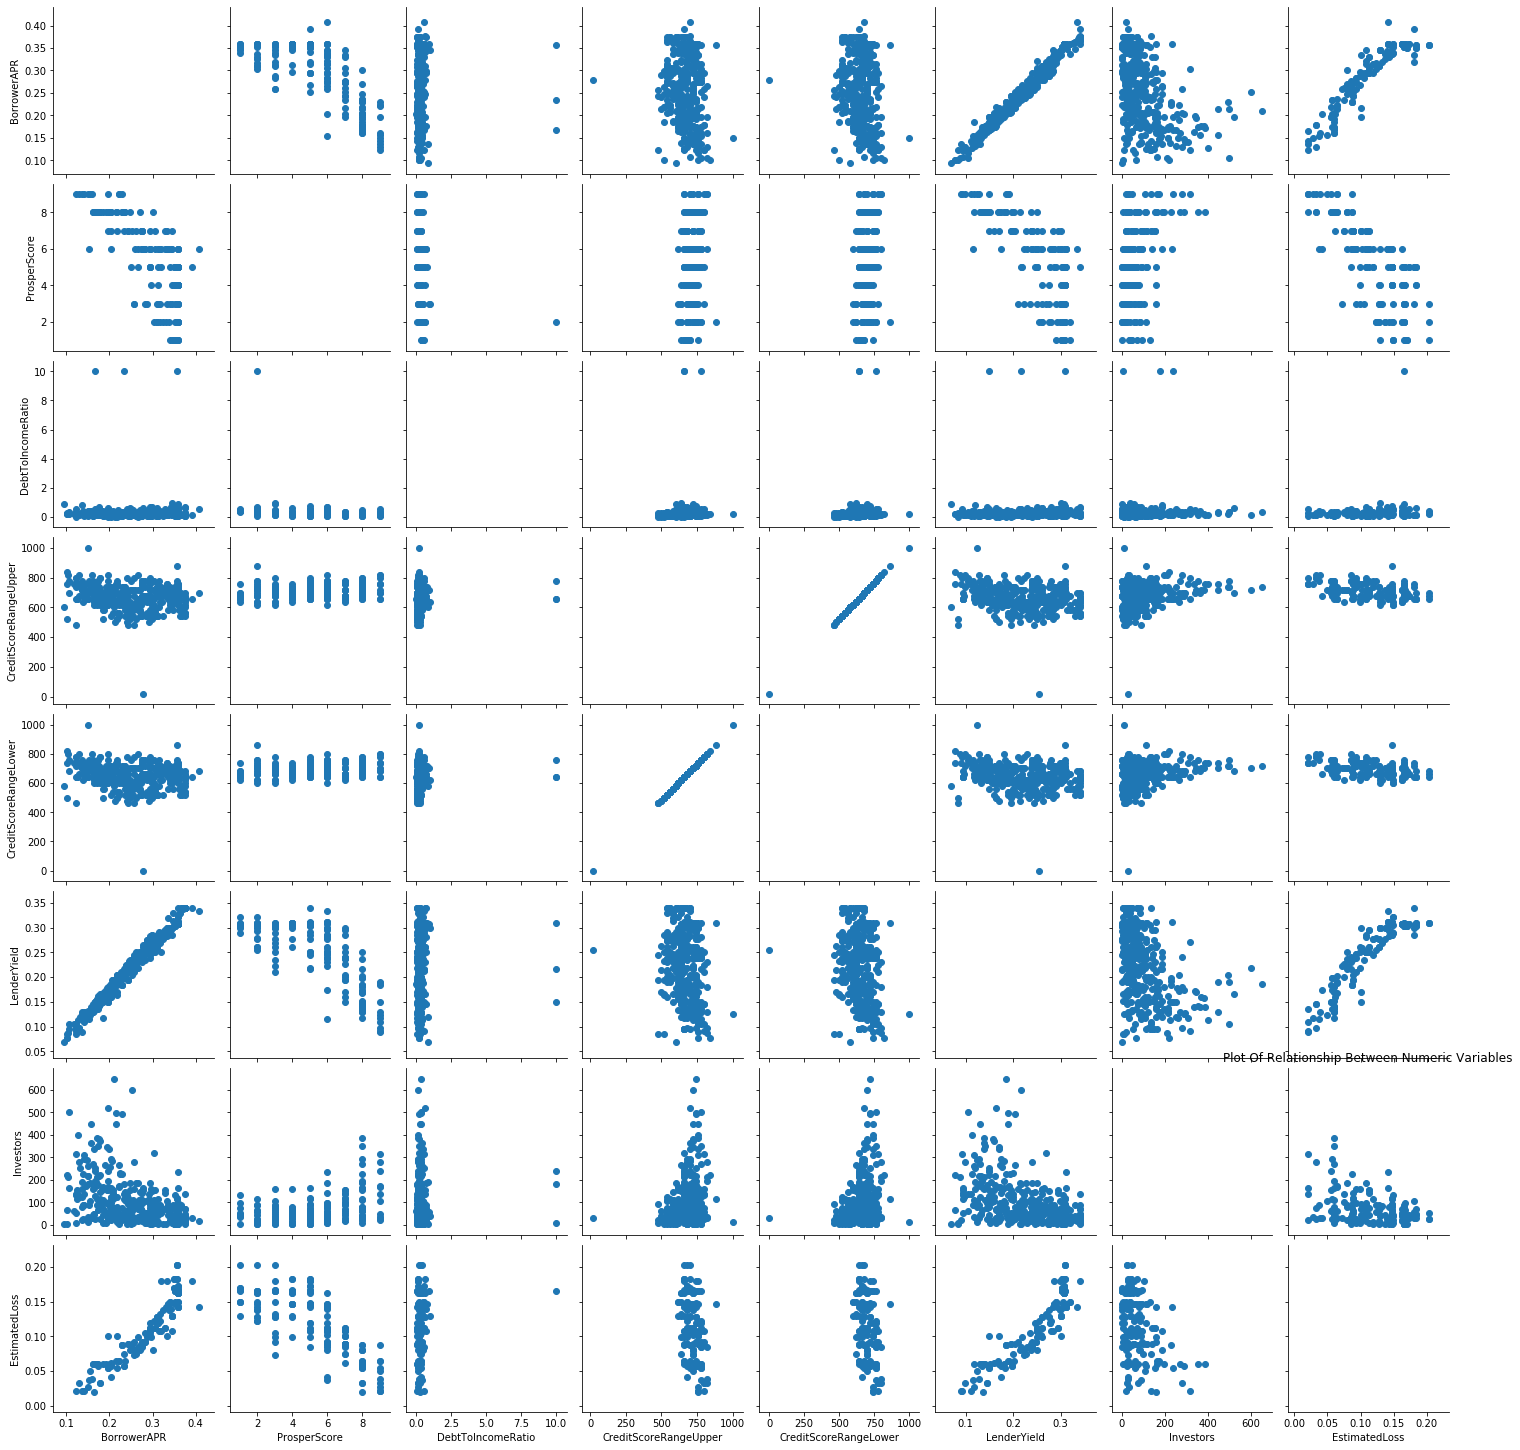

In [85]:
numeric_variables = ['BorrowerAPR', 'ProsperScore', 'DebtToIncomeRatio', 
                     'CreditScoreRangeUpper', 'CreditScoreRangeLower', 'LenderYield', 'Investors', 'EstimatedLoss']
plt.figure(figsize = [15, 12]);
g = sb.PairGrid(data = samples_loan, vars = numeric_variables)
g.map_offdiag(plt.scatter) ;        
plt.title('Plot Of Relationship Between Numeric Variables')
plt.show();

It is interesting to see that Prosper Score and Borrower APR are negatively correlated, meaning as the Prosper Score decreases, the Borrower APR increases.  We can also see that Lender Yield and Borrower APR have a very strong positive correlation.   Lender Yield also has a strong positive correlation with Estimated Loss.

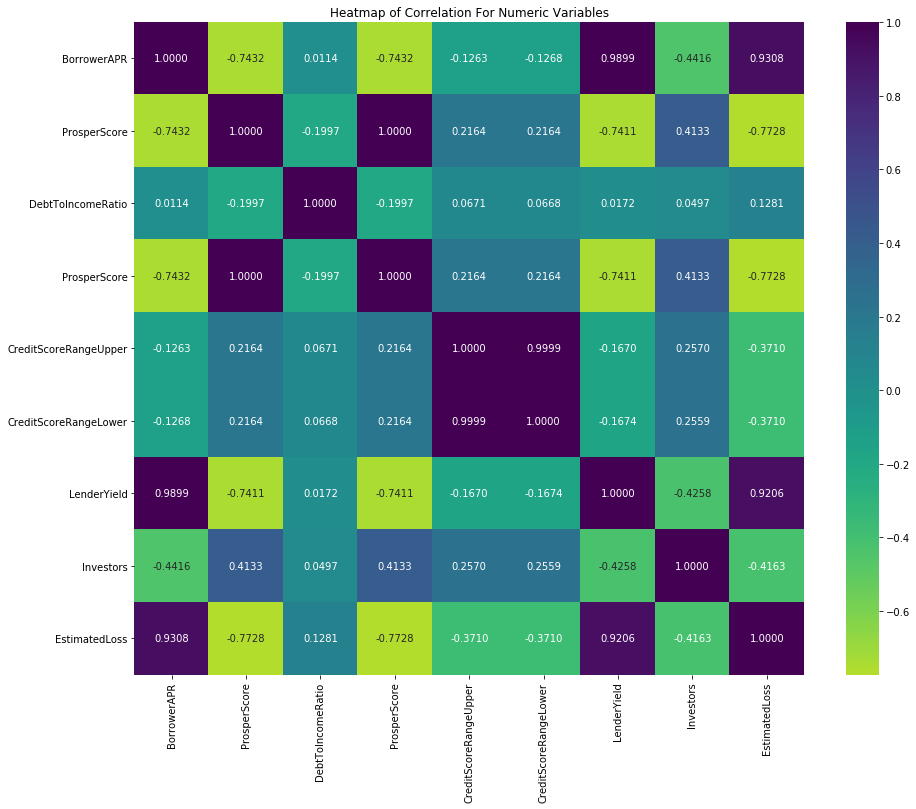

In [86]:
numeric_variables = ['BorrowerAPR', 'ProsperScore', 'DebtToIncomeRatio', 
                     'ProsperScore', 'CreditScoreRangeUpper', 'CreditScoreRangeLower', 'LenderYield', 'Investors', 
                     'EstimatedLoss']

plt.figure(figsize = [15, 12]);
sb.heatmap(samples_loan[numeric_variables].corr(), annot=True,
          cmap = 'viridis_r', center = 0, fmt = '.4f');
plt.title('Heatmap of Correlation For Numeric Variables');

As can be seen from the heatmap above, Posper Score and Borrower APR are negatively correlated.  The strength is considered moderate.  A correlation is considered as moderate if the correlation is greater than 0.4 and less than 0.7.  Borrower APR and Lender Yield have a strong positive correlation.  Lender Yield and Estimated Loss also have a strong positive correlation.  Credit score has a negative correlation to Borrower APR and the strength is very weak.  A correlation is considered very weak if it is less than 0.3 and none as it approaches 0.0.  The Prosper Score has a slightly larger positive correlation to Credit Score (Upper and Lower), but at 0.318, it is considered Weak.  Therefore, we will focus on Borrower APR, Lender Yield, Estimated Loss and Prosper Score in this section of the analysis .

First, we will look at the Lender Yield, Estimated Loss and the number of investors.

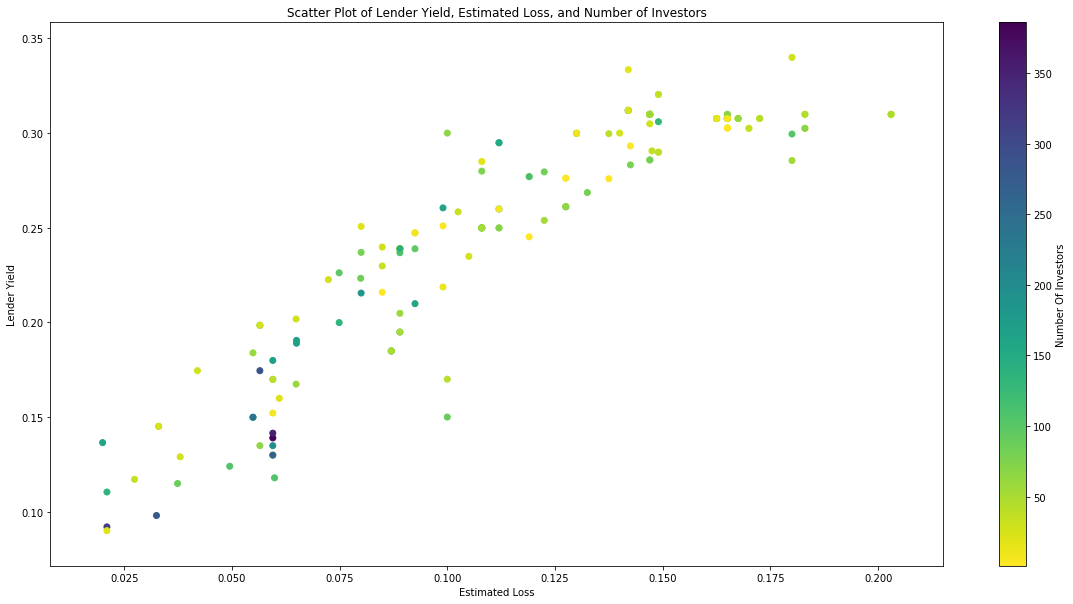

In [87]:
plt.figure(figsize = [20, 10])
plt.scatter(data=samples_loan, x='EstimatedLoss', y='LenderYield', c = 'Investors',
           cmap = 'viridis_r')
plt.colorbar(label = 'Number Of Investors');
plt.title('Scatter Plot of Lender Yield, Estimated Loss, and Number of Investors')
plt.ylabel('Lender Yield')
plt.xlabel('Estimated Loss')
;

There is a strong positive correlation between Estimated Loss and Lender Yield, meaning we expect to see a higher loss at the higher lender yield.  It is also interesting that the number of investors tends to fall between less than 50 and 150.  The highest number of investors appears in the 13% to 27% Lender Yield and at an estimated loss between 5 to 10%.   It is also interesting that a number of investors were willing to invest in a loan with an estimated loss greater than 35% at a lender yield of approximately 34%.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The following findings were of revealed as a result of this investigation:

* The Annual Percentage Rate is higher for smaller loan sizes.  Also, there is an decrease in variability of the interest rate as the size of the loan increases. 

* Borrower APR appeared to increase in all categories from 2007 to 2011. It appeared to decline after 2011 decline for all but 2 categories of employment status (Not Employed and Part Time). Employed and Retired appear to have been added as employment status categories in 2010. Also, Emloyment Status appears to not have been tracked as separate categories prior to 2007.

### Were there any interesting or surprising interactions between features?

The following iteractions between features were interesting:

* Prosper Score and Borrower APR are negatively correlated, meaning as the Prosper Score decreases, the Borrower APR increases.  The strength is considered moderate.  A correlation is considered as moderate if the correlation is greater than 0.4 and less than 0.7.  
* Lender Yield and Borrower APR have a very strong positive correlation.   
* Lender Yield also has a strong positive correlation with Estimated Loss.
* Credit score has a negative correlation to Borrower APR and the strength is very weak.  A correlation is considered very weak if it is less than 0.3 and none as it approaches 0.0.  
* The Prosper Score has a slightly larger positive correlation to Credit Score (Upper and Lower), but at 0.318, it is considered Weak.  
* There is a strong positive correlation between Estimated Loss and Lender Yield, meaning we expect to see a higher loss at the higher lender yield. 
*  It is also interesting that the total number of investors in a loan tends to fall between less than 50 and 150.  The highest number of investors appears in the 13% to 27% Lender Yield and at an estimated loss between 5 to 10%.   
* It is also interesting that a number of investors were willing to invest in a loan with an estimated loss greater than 35% at a lender yield of approximately 34%.

